In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf


In [2]:
yf.pdr_override()
tickers = ['AAPL']
start = '2008-01-01'
end = '2022-03-31'

stock_data = pdr.get_data_yahoo('AAPL', start, end)
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,7.116786,7.152143,6.876786,6.958571,5.914385,1079178800
2008-01-03,6.978929,7.049643,6.881786,6.961786,5.917118,842066400
2008-01-04,6.837500,6.892857,6.388929,6.430357,5.465432,1455832000
2008-01-07,6.473214,6.557143,6.079643,6.344286,5.392280,2072193200
2008-01-08,6.433571,6.516429,6.100000,6.116071,5.198308,1523816000


In [3]:
stock_data.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-24,171.059998,174.139999,170.210007,174.070007,172.782898,90131400
2022-03-25,173.880005,175.279999,172.750000,174.720001,173.428085,80546200
2022-03-28,172.169998,175.729996,172.000000,175.600006,174.301575,90371900
2022-03-29,176.690002,179.009995,176.339996,178.960007,177.636734,100589400
2022-03-30,178.550003,179.610001,176.699997,177.770004,176.455536,92633200


In [4]:
stock_data = stock_data.reset_index()

In [5]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-02,7.116786,7.152143,6.876786,6.958571,5.914385,1079178800
1,2008-01-03,6.978929,7.049643,6.881786,6.961786,5.917118,842066400
2,2008-01-04,6.837500,6.892857,6.388929,6.430357,5.465432,1455832000
3,2008-01-07,6.473214,6.557143,6.079643,6.344286,5.392280,2072193200
4,2008-01-08,6.433571,6.516429,6.100000,6.116071,5.198308,1523816000


In [6]:
stock_data = stock_data.drop(['Date', 'Adj Close'], axis = 1)

In [7]:
stock_data.head()

,Open,High,Low,Close,Volume
0,7.116786,7.152143,6.876786,6.958571,1079178800
1,6.978929,7.049643,6.881786,6.961786,842066400
2,6.837500,6.892857,6.388929,6.430357,1455832000
3,6.473214,6.557143,6.079643,6.344286,2072193200
4,6.433571,6.516429,6.100000,6.116071,1523816000


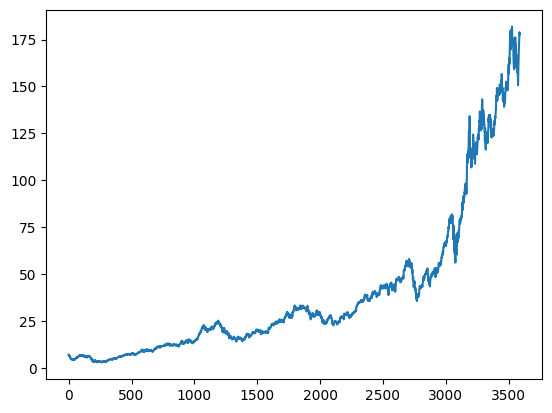

In [8]:
plt.plot(stock_data.Close)

In [9]:
ma100 = stock_data.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3582    166.020101
3583    166.277701
3584    166.533501
3585    166.808201
3586    167.076301
Name: Close, Length: 3587, dtype: float64

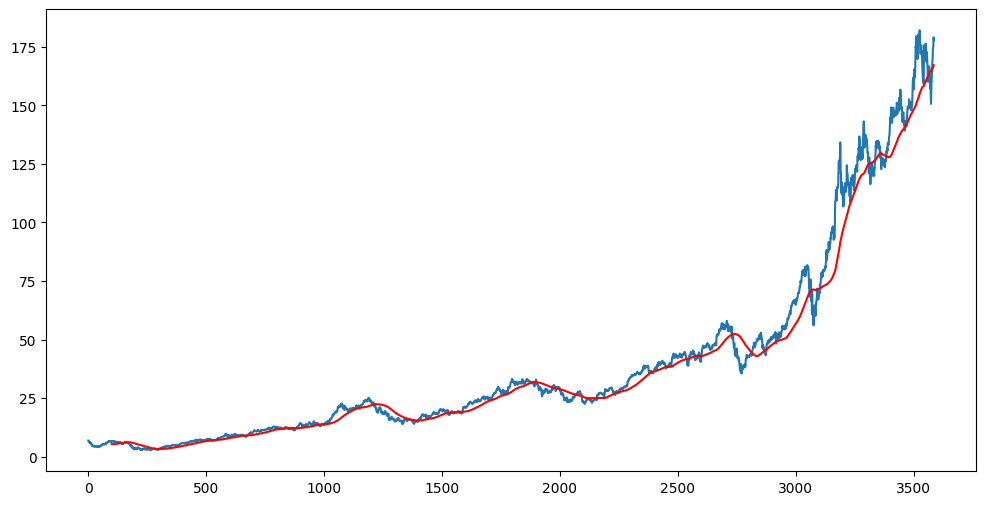

In [10]:
plt.figure(figsize = (12,6))
plt.plot(stock_data.Close)
plt.plot(ma100, 'r')

In [11]:
ma200 = stock_data.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3582    155.30835
3583    155.55140
3584    155.79265
3585    156.03505
3586    156.27570
Name: Close, Length: 3587, dtype: float64

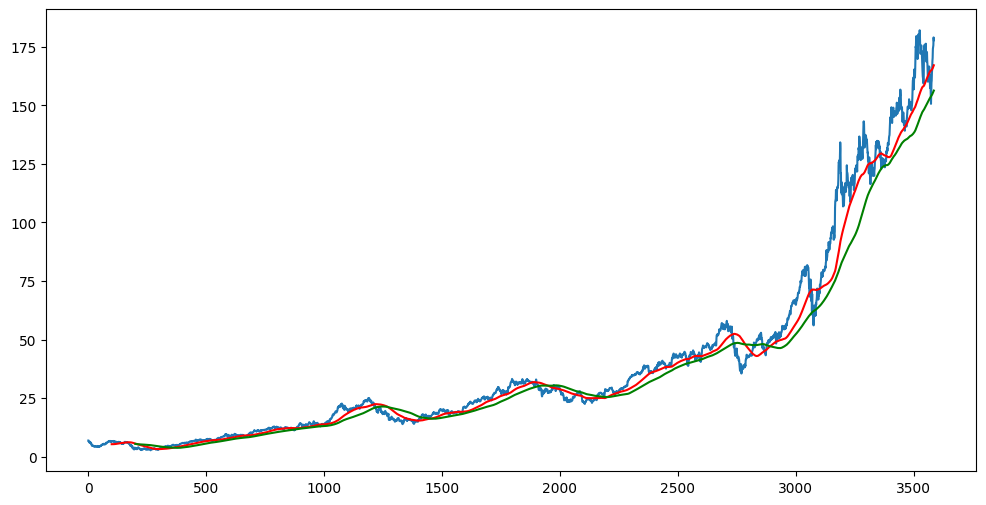

In [12]:
plt.figure(figsize = (12,6))
plt.plot(stock_data.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [13]:
stock_data.shape

(3587, 5)

In [14]:
#Splitting data into Training and Testing

#Creating Dataframe for Training and Testing
data_training = pd.DataFrame(stock_data['Close'][0:int(len(stock_data)*0.70)])
data_testing = pd.DataFrame(stock_data['Close'][int(len(stock_data)*0.70):int(len(stock_data))])

print(data_training.shape)
print(data_testing.shape)


(2510, 1)
(1077, 1)


In [15]:
data_training.head()


,Close
0,6.958571
1,6.961786
2,6.430357
3,6.344286
4,6.116071


In [16]:
data_testing.head()

,Close
2510,43.634998
2511,43.587502
2512,43.752499
2513,43.752499
2514,42.642502


In [17]:
#Scaling the Data from 0 and 1 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [18]:
data_training_array = scaler.fit_transform(data_training)

In [19]:
data_training_array

array([[0.1008351 ],
       [0.10091292],
       [0.08804917],
       ...,
       [0.97458376],
       [0.98517387],
       [1.        ]])

In [20]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train

[array([[0.1008351 ],
        [0.10091292],
        [0.08804917],
        [0.08596574],
        [0.08044159],
        [0.08748726],
        [0.08629425],
        [0.08168647],
        [0.08695127],
        [0.07853106],
        [0.07040477],
        [0.07148537],
        [0.0718917 ],
        [0.06694676],
        [0.05262203],
        [0.04962221],
        [0.04478967],
        [0.04478967],
        [0.04611235],
        [0.04666563],
        [0.04941475],
        [0.0480229 ],
        [0.04620746],
        [0.04422775],
        [0.03786504],
        [0.03720802],
        [0.04087351],
        [0.04430554],
        [0.04033752],
        [0.04426234],
        [0.04258521],
        [0.04013866],
        [0.03802064],
        [0.03943843],
        [0.03746736],
        [0.03566922],
        [0.03591129],
        [0.03540121],
        [0.03869497],
        [0.04470323],
        [0.04047583],
        [0.03763162],
        [0.04013002],
        [0.04001763],
        [0.03694004],
        [0

In [21]:
x_train, y_train = np.asarray(x_train, np.float32), np.asarray(y_train, np.float32)

In [22]:
#ML Model
import tensorflow as tf
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential



In [23]:
model = Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences = True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

#Connect all these layers using the Dense Layer
model.add(Dense(units=1))


In [24]:
#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)


Epoch 1/50
76/76 [==============================] - 18s 156ms/step - loss: 0.0345
Epoch 2/50
76/76 [==============================] - 13s 171ms/step - loss: 0.0082
Epoch 3/50


KeyboardInterrupt: 

In [ ]:
#Saving the Model
model.save('keras_model.h5')

In [ ]:
data_testing.head()

In [ ]:
#Create the data testing set
past_100_days = data_training.tail(100)
final_df = past_100_days.append(data_testing, ignore_index=True)
final_df.head()

In [ ]:
#Transform the data into 0 to 1
input_data = scaler.fit_transform(final_df)
input_data


In [ ]:
input_data.shape


In [ ]:
#Define xTest and yTest
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [ ]:
#Convert into array
x_test, y_test = np.asarray(x_test), np.asarray(y_test)


In [ ]:
print(x_test.shape)
print(y_test.shape)


In [ ]:
#Making Predictions
y_predicted = model.predict(x_test)
y_predicted.shape

In [ ]:
y_predicted


In [ ]:
#Scaling up the values
scaler.scale_


In [ ]:
scaler_factor = 1/0.00682769

In [ ]:
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()